In [1]:
%reset -f

In [160]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pylab import *
import multiprocessing
import seaborn as sns
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectPercentile, f_classif, chi2
from sklearn.feature_selection import VarianceThreshold, f_regression
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import Imputer
from numpy import corrcoef, sum, log, arange
from pylab import pcolor, show, colorbar, xticks, yticks
import seaborn as sns
import pandas as pd
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.cluster import KMeans,MiniBatchKMeans
from scipy.stats import pearsonr
from sklearn.covariance import EmpiricalCovariance, MinCovDet
from sklearn.externals import joblib
from sklearn.decomposition import PCA, RandomizedPCA, KernelPCA
from sklearn.cross_validation import train_test_split
from sklearn.cross_validation import StratifiedShuffleSplit
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.cross_validation import StratifiedKFold
from sklearn.feature_selection import RFECV,RFE
from sklearn.datasets import make_classification
import numpy as np
import matplotlib.pyplot as plt
from sklearn import cross_validation
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.datasets import load_digits
from sklearn.learning_curve import learning_curve
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import LinearSVC
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.externals import joblib
from sklearn.feature_selection import SelectFromModel
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from imblearn.over_sampling import SMOTE,ADASYN, RandomOverSampler
from scipy.stats import pearsonr, spearmanr,mannwhitneyu
from sklearn.linear_model import LassoCV

from imblearn.pipeline import Pipeline
from sklearn.pipeline import FeatureUnion
from sklearn.grid_search import GridSearchCV, ParameterGrid
from sklearn.metrics import f1_score, precision_score, precision_recall_fscore_support,classification_report,confusion_matrix

import pickle
import os

np.set_printoptions(suppress=True)
pd.options.display.float_format = '{:,.2f}'.format
colors = plt.rcParams['axes.color_cycle']
%matplotlib inline

import sys
sys.path.insert(1, "/home/aegle/projects/myosa/src/")
from TypeFeatImputer import TypeFeatImputer
from i_score_parallel import i_score
from TypeFeatFS import DiscreteFS, ContinuousFS
from TypeFeatFilter import DiscreteFilter, ContinuousFilter
from FeatFilter import FeatFilter
from OutlierFiltering import OutlierFiltering
from typeFeat_score import typeFeat_score
from UnivCombineFilter import UnivCombineFilter
import mifs.mifs

In [3]:
#suffix = '_no_out'
suffix = ''

#### Create names for selection methods

In [4]:
filenames = []
filenames.append(os.path.join('resources','data_partition_cl0_short_no_monit_14012016{}.pkl'.format(suffix)))
filenames.append(os.path.join('resources','data_partition_cl0_short_1m_monit_14012016{}.pkl'.format(suffix)))
filenames.append(os.path.join('resources','data_partition_cl0_short_3m_1m_monit_14012016{}.pkl'.format(suffix)))

saveFileNames_rfecv = []
saveFileNames_rfecv.append(os.path.join('resources','rfecv_cl0_short_no_monit_14012016{}.pkl'.format(suffix)))
saveFileNames_rfecv.append(os.path.join('resources','rfecv_cl0_short_1m_monit_14012016{}.pkl'.format(suffix)))
saveFileNames_rfecv.append(os.path.join('resources','rfecv_cl0_short_3m_1m_monit_14012016{}.pkl'.format(suffix)))

saveFileNames_pca = []
saveFileNames_pca.append(os.path.join('resources','pca_cl0_short_no_monit_14012016{}.pkl'.format(suffix)))
saveFileNames_pca.append(os.path.join('resources','pca_cl0_short_1m_monit_14012016{}.pkl'.format(suffix)))
saveFileNames_pca.append(os.path.join('resources','pca_cl0_short_3m_1m_monit_14012016{}.pkl'.format(suffix)))

saveFileNames_kpca = []
saveFileNames_kpca.append(os.path.join('resources','kpca_cl0_short_no_monit_14012016{}.pkl'.format(suffix)))
saveFileNames_kpca.append(os.path.join('resources','kpca_cl0_short_1m_monit_14012016{}.pkl'.format(suffix)))
saveFileNames_kpca.append(os.path.join('resources','kpca_cl0_short_3m_1m_monit_14012016{}.pkl'.format(suffix)))

saveFileNames_ftest = []
saveFileNames_ftest.append(os.path.join('resources','ftest_cl0_short_no_monit_14012016{}.pkl'.format(suffix)))
saveFileNames_ftest.append(os.path.join('resources','ftest_cl0_short_1m_monit_14012016{}.pkl'.format(suffix)))
saveFileNames_ftest.append(os.path.join('resources','ftest_cl0_short_3m_1m_monit_14012016{}.pkl'.format(suffix)))

saveFileNames_extra = []
saveFileNames_extra.append(os.path.join('resources','extra_cl0_short_no_monit_14012016{}.pkl'.format(suffix)))
saveFileNames_extra.append(os.path.join('resources','extra_cl0_short_1m_monit_14012016{}.pkl'.format(suffix)))
saveFileNames_extra.append(os.path.join('resources','extra_cl0_short_3m_1m_monit_14012016{}.pkl'.format(suffix)))

saveFileNames_lasso = []
saveFileNames_lasso.append(os.path.join('resources','lasso_cl0_short_no_monit_14012016{}.pkl'.format(suffix)))
saveFileNames_lasso.append(os.path.join('resources','lasso_cl0_short_1m_monit_14012016{}.pkl'.format(suffix)))
saveFileNames_lasso.append(os.path.join('resources','lasso_cl0_short_3m_1m_monit_14012016{}.pkl'.format(suffix)))

#### Select dataset to work with

In [5]:
index = 2 # [0,1,2]

### Data partition (training) load

Load filtered data, clean and partition the data for all classifiers (CL0)

In [137]:
#Load Train & test data
f = file(filenames[index],"rb")
X_train = np.load(f).astype(float)
y_train = np.load(f).astype(int)
X_test = np.load(f).astype(float)
y_test = np.load(f).astype(int)
columns = np.load(f)
tr_codes = np.load(f)
ts_codes = np.load(f)
feat_types = np.load(f)
feat_types = dict(feat_types.tolist())
f.close()

X = np.vstack((X_train, X_test))
y = np.vstack((y_train.reshape(-1,1), y_test.reshape(-1,1)))

print X.shape, y.shape, columns.shape
print X_train.shape, X_test.shape
print columns

(42, 70) (42, 1) (71,)
(29, 70) (13, 70)
['GENERO' 'ACTIVO' 'JUBILADO' 'EDAD' 'FUMA' 'FUMA_PAQ_ANY' 'FUMA_EX_ANYS'
 'ALCOHOL' 'ALCOHOL_GR_DIA' 'CAFES_DIA' 'DEPRESION' 'ANSIEDAD' 'HTA'
 'CARDIOPATIA' 'ENF_RESP' 'DIABETES' 'OBESIDAD' 'DISLIPEMIA'
 'OBSTR_NASAL_CRON' 'RONCA' 'SUE_REP' 'CRISIS_ASF' 'NICTURIA' 'APNEAS_PRES'
 'CEFALEA' 'SOMN_DIURN' 'DESPERTAR_NOCT' 'TRAST_CONC' 'IRR_APAT_DEPR'
 'INSOMNIO' 'ACT_MOTR_NOCT' 'SEN_SUE_REAL_DORM' 'SUE_INT_PIROSIS'
 'DISM_DESEO_SEX' 'IECAS' 'DIURETICOS' 'ANTIAGREG' 'ANTIACID' 'HIPOLIPEM'
 'BDZ' 'TIEMP_SUENO' 'IAH' 'TIEMPOSAT<90%' 'IND_DESAT' 'TALLA' 'IMC'
 'CIRC_CUELLO' 'MEDIA_TAS' 'MEDIA_TAD' 'Sat O2' 'PRESS_CPAP' 'EPWORTH'
 'EUROQOL' 'VISUAL' 'HORAS_USO_TOT_1' 'HORAS_USO_MED_NOCHE_1'
 'AL_IRR_CUT_MASC_1' 'BOCA_SECA_1' 'MEDIA_TAS_1' 'MEDIA_TAD_1' 'EPWORTH_1'
 'EUROQOL_1' 'VISUAL_EUROQOL_1' 'HORAS_USO_MED_NOCHE_3' 'BOCA_SECA_3'
 'MEDIA TAS_3' 'MEDIA TAD_3' 'EPWORTH_3' 'EUROQOL_3' 'VISUAL EUROQOL_3'
 'LABEL']


#### Feature types

In [138]:
catCols = []
reducedCols = columns[:-1]

for i in range(len(columns)-1):
    if feat_types[columns[i]] == 'object' \
        or columns[i] in ("RONCA","SUE_REP","CRISIS_ASF","NICTURIA","APNEAS_PRES","CEFALEA",
                "SOMN_DIURN","DESPERTAR_NOCT","TRAST_MEM","TRAST_CONC","IRR_APAT_DEPR"):
        catCols.append(1)
    else:
        catCols.append(0)
catCols = np.array(catCols)

print "Cat cols:", np.sum(catCols==1)
print "Num cols:", np.sum(catCols==0)
print len(reducedCols)

Cat cols: 38
Num cols: 32
70


#### Feature imputation

In [139]:
print np.sum(np.isnan(X))
imputer = TypeFeatImputer(catCols, reducedCols)
imputer.fit(X, y)
X = imputer.transform(X)

print "Nulls after imputation:", np.sum(np.sum(np.isnan(X)))

67
Nulls after imputation: 0


### Remove features

In [140]:
to_del_name = []
to_del_ix = []

#### Low variant features

In [141]:
varFilter = VarianceThreshold(threshold=0.0)
varFilter.fit(X)

to_del_name.extend(columns[:-1][varFilter.get_support() == 0])
to_del_ix.extend(np.where(varFilter.get_support() == 0)[0])

print X.shape
print "Filtered columns:", np.sum(varFilter.get_support()==False)
print to_del_ix,[columns[d] for d in to_del_ix]

(42, 70)
Filtered columns: 0
[] []


#### Highly correlated features

In [142]:
cols_corr = []
p_scores = []
p_scores_all = []
v_th = 0.15

for i in range(X.shape[1]):
    for j in range(X.shape[1]):
        if i != j and (i,j) not in cols_corr and (j,i) not in cols_corr:
            
            cols_corr.append((i,j))
            coeff_corr, p_score = spearmanr(X[:,i], X[:,j])
            
            if float(coeff_corr) > (1.0 - v_th) or float(coeff_corr) < (v_th - 1.0) :
                sc1, pval1 = mannwhitneyu(X[:,i].reshape(-1,1),y.reshape(-1,1))
                sc2, pval2 = mannwhitneyu(X[:,j].reshape(-1,1),y.reshape(-1,1))
                
                print "\nSimilar features",columns[i],"and",columns[j],"score:", coeff_corr
                print "Class significance of", columns[i], "is", pval1
                print "Class significance of", columns[j], "is", pval2
                to_del_ix.append(j)
                to_del_name.append(columns[j])
                p_scores.append([i, j, coeff_corr, p_score])
                
            p_scores_all.append([i, j, coeff_corr, p_score])

print "Columns to delete:", len(to_del_name), to_del_name
print to_del_ix


Similar features ACTIVO and JUBILADO score: -0.857492925713
Class significance of ACTIVO is 0.414979503738
Class significance of JUBILADO is 0.0148575446864

Similar features ALCOHOL and ALCOHOL_GR_DIA score: 0.874313210259
Class significance of ALCOHOL is 0.0974316203361
Class significance of ALCOHOL_GR_DIA is 0.27947537567
Columns to delete: 2 ['JUBILADO', 'ALCOHOL_GR_DIA']
[2, 8]


#### Delete columns

In [143]:
if len(to_del_name) > 0:

    clean_cols_ix = [i for i in range(X_train.shape[1]) if i not in to_del_ix]
    clean_cols_name = columns[clean_cols_ix]
    
    print "Clean cols:", len(clean_cols_ix)

    catCols = []
    for i in range(len(clean_cols_name)):
        if feat_types[clean_cols_name[i]] == 'object' \
            or columns[i] in ("RONCA","SUE_REP","CRISIS_ASF","NICTURIA","APNEAS_PRES","CEFALEA",
                    "SOMN_DIURN","DESPERTAR_NOCT","TRAST_MEM","TRAST_CONC","IRR_APAT_DEPR"):
            catCols.append(1)
        else:
            catCols.append(0)
            
    catCols = np.array(catCols)
    columns = clean_cols_name.tolist()
    columns.extend(["LABEL"])
    columns = np.array(columns)
    reducedCols = columns[:-1]
    
    X_train = X_train[:, clean_cols_ix]
    X_test = X_test[:, clean_cols_ix]
    X = X[:,clean_cols_ix]
    
    print "Cat cols:", np.sum(catCols==1)
    print "Num cols:", np.sum(catCols==0)
    print np.array(columns)[catCols == 0]
    
    print len(reducedCols)
    print X_train.shape
    print X_test.shape
    print X.shape

Clean cols: 68
Cat cols: 35
Num cols: 33
['EDAD' 'FUMA_PAQ_ANY' 'FUMA_EX_ANYS' 'CAFES_DIA' 'RONCA' 'SUE_REP'
 'TIEMP_SUENO' 'IAH' 'TIEMPOSAT<90%' 'IND_DESAT' 'TALLA' 'IMC'
 'CIRC_CUELLO' 'MEDIA_TAS' 'MEDIA_TAD' 'Sat O2' 'PRESS_CPAP' 'EPWORTH'
 'EUROQOL' 'VISUAL' 'HORAS_USO_TOT_1' 'HORAS_USO_MED_NOCHE_1' 'MEDIA_TAS_1'
 'MEDIA_TAD_1' 'EPWORTH_1' 'EUROQOL_1' 'VISUAL_EUROQOL_1'
 'HORAS_USO_MED_NOCHE_3' 'MEDIA TAS_3' 'MEDIA TAD_3' 'EPWORTH_3'
 'EUROQOL_3' 'VISUAL EUROQOL_3']
68
(29, 68)
(13, 68)
(42, 68)


/home/aegle/miniconda2/envs/myosa/lib/python2.7/site-packages/ipykernel/__main__.py:28: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 69 but corresponding boolean dimension is 68


#### 0. Feature scaling

In [146]:
print np.sum(np.isnan(X_train))
imputer = TypeFeatImputer(catCols, reducedCols)
imputer.fit(X_train, y_train)
X_imputed = imputer.transform(X_train)

print "Nulls after imputation:", np.sum(np.sum(np.isnan(X_imputed)))

47
Nulls after imputation: 0


In [147]:
scaler = preprocessing.StandardScaler().fit(X_imputed)
X_SCALED = scaler.transform(X_imputed)
print "X scaled", X_SCALED.shape

X scaled (29, 68)


#### 1. Feature Sampling

In [148]:
def plot_resampling(ax, X, y, title):
    c0 = ax.scatter(X[y == 0, 0], X[y == 0, 1], label="Class #0")
    c1 = ax.scatter(X[y == 1, 0], X[y == 1, 1], label="Class #1")
    ax.set_title(title)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()
    ax.spines['left'].set_position(('outward', 10))
    ax.spines['bottom'].set_position(('outward', 10))
    ax.set_xlim([-6, 8])
    ax.set_ylim([-6, 6])

    return c0, c1

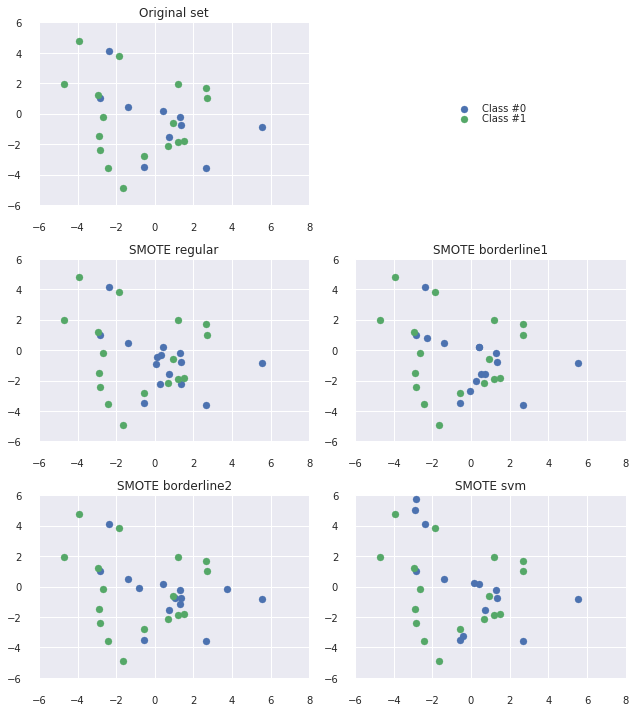

In [150]:
# Instanciate a PCA object for the sake of easy visualisation
pca = PCA(n_components=2)

# Fit and transform x to visualise inside a 2D feature space
X_vis = pca.fit_transform(X_SCALED)

# Apply regular SMOTE
kind = ['regular', 'borderline1', 'borderline2', 'svm']
sm = [SMOTE(kind=k,k_neighbors=3) for k in kind]

X_resampled = []
y_resampled = []
X_res_vis = []
for method in sm:
    X_res, y_res = method.fit_sample(X_SCALED, y_train)
    X_resampled.append(X_res)
    y_resampled.append(y_res)
    X_res_vis.append(pca.transform(X_res))

# Two subplots, unpack the axes array immediately
plt.figure(figsize=(15,20))
f, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(3, 2,figsize=(9,10))

# Remove axis for second plot
ax2.axis('off')
ax_res = [ax3, ax4, ax5, ax6]

c0, c1 = plot_resampling(ax1, X_vis, y_train, 'Original set')
for i in range(len(kind)):
    plot_resampling(ax_res[i], X_res_vis[i], y_resampled[i],
                    'SMOTE {}'.format(kind[i]))

ax2.legend((c0, c1), ('Class #0', 'Class #1'), loc='center',
           ncol=1, labelspacing=0.)
plt.tight_layout()
plt.show()

#### 2. Filter features by timepoint

In [151]:
timePointCols = []
for c in columns[:-1]:
    if index == 0:
        timePointCols.append([1])
    if index == 1:
        if "_1" in c:
            timePointCols.append([1])
        else:
            timePointCols.append([0])
    if index == 2:
        if "_3" in c:
            timePointCols.append([1])
        else:
            timePointCols.append([0])
    
    
timePointCols = np.array(timePointCols)    
print timePointCols.shape
print np.where(timePointCols == 1)[0]
print len(columns)
print type(columns)
print columns[np.where(timePointCols == 1)[0]]

(68, 1)
[61 62 63 64 65 66 67]
69
<type 'numpy.ndarray'>
['HORAS_USO_MED_NOCHE_3' 'BOCA_SECA_3' 'MEDIA TAS_3' 'MEDIA TAD_3'
 'EPWORTH_3' 'EUROQOL_3' 'VISUAL EUROQOL_3']


### 3. Feature selection

#### Evaluation function

In [173]:
def eval_fs(X_train, X_test, y_train, y_test, selector=None, cls_method="logReg",cv_thr=0.3, metric="f1_weighted"):
    
    #Prepare cv
    cv_inner = StratifiedShuffleSplit(y_train, n_iter=10, test_size=cv_thr,random_state=24)
    cv_outer = StratifiedShuffleSplit(y_train, n_iter=10, test_size=cv_thr,random_state=42)

            
    #Define pipeline main steps
    basePipeline = Pipeline([
            ("Imputer", TypeFeatImputer(catCols, reducedCols))           
        ])
        
    params = {}
    pipeline = []
    pipe = Pipeline(list(basePipeline.steps))

    if selector != None:
        if type(selector) in [UnivCombineFilter, UnivCombineFilterLocal]:
            pipe.steps.append(("fs", selector))
            pipe.steps.append(("Scaler", StandardScaler()))
        else:
            pipe.steps.append(("Scaler", StandardScaler()))
            pipe.steps.append(("fs", selector))
    else:
        pipe.steps.append(("Scaler", StandardScaler()))
        
        
    # Set classifiers
    if cls_method == "logReg":
        pipe.steps.append((cls_method, LogisticRegression(random_state=42)))
        params.update({cls_method + '__C': [0.00001,0.0001,0.001,0.01,0.1,0.3,0.5,0.7,1,5,10,]})
        params.update({cls_method + '__class_weight': [None, 'balanced']})
        params.update({cls_method + '__penalty': ['l1', 'l2']})
    
    if cls_method == "svmRBF":
        pipe.steps.append((cls_method, SVC(random_state=42,probability=True)))
        params.update({'svmRBF__C': [0.001,0.01,0.1,0.5,1,5,10,50,100,150,200], 
         'svmRBF__gamma' : [0.00001,0.0001,0.001,0.01, 0.1,1,10]})
        params.update({'svmRBF__class_weight': [None, 'balanced']})
    
    if cls_method == "rf":
        pipe.steps.append((cls_method, RandomForestClassifier(n_jobs=-1,random_state=42)))
        params.update({'rf__n_estimators': [100,200,500,750,1000], 'rf__criterion': ['entropy','gini'],
                     'rf__max_depth' : [None,4,6]})
        params.update({'rf__class_weight': [None, 'balanced']})
    
    print pipe.steps
    
    #Build pipeline
    grid_pipeline = GridSearchCV(pipe, params, verbose=0, 
                                 n_jobs=-1, cv=cv_inner, scoring= metric, error_score = 0,
                                 refit=True) 
    grid_pipeline.fit(X_train, y_train)
    
    cv_inner_f1 = cross_validation.cross_val_score(grid_pipeline.best_estimator_, X_train, y_train, 
                                             cv=cv_inner, scoring='f1_weighted', n_jobs=-1)
        
    cv_f1 = cross_validation.cross_val_score(grid_pipeline.best_estimator_, X_train, y_train, 
                                             cv=cv_outer, scoring='f1_weighted', n_jobs=-1)

    # Computel Train score (with best CV params)
    y_pred = grid_pipeline.best_estimator_.predict(X_train)                
    train_scores = precision_score(y_train, y_pred, average='weighted', pos_label=None)
    train_f1_scores = f1_score(y_train, y_pred, average='weighted', pos_label=None)
    
    #Compute test score
    y_pred = grid_pipeline.best_estimator_.predict(X_test)
    test_f1 = f1_score(y_test, y_pred, average='weighted', pos_label=None)
    print "Performance in test:"
    print classification_report(y_test, y_pred)
    print confusion_matrix(y_test, y_pred)
    
    return [cls_method,
            grid_pipeline.best_params_.values(),
            train_f1_scores,
            np.mean(cv_inner_f1), 
            np.std(cv_inner_f1),
            np.mean(cv_f1), 
            np.std(cv_f1),            
            test_f1]

In [174]:
THRESHOLD = 0.99

#### a) Unsupervised features exploration (NO class label)

explained variance ratio (first components)
: [ 0.1252543   0.11599406  0.09250455  0.07194644  0.06154873  0.05797642
  0.05421616  0.0464917   0.04119115  0.04000547  0.0337647   0.03068673
  0.02830573  0.02551213  0.02371962  0.02219667  0.0199815   0.01682108
  0.01541435  0.01375522  0.01313655  0.00981474  0.00938401  0.00819078
  0.00734724  0.00576953  0.00472154  0.00434887  0.        ]
Num components: 26 for variance > 99% (variance: 0.990929588192 )


/home/aegle/miniconda2/envs/myosa/lib/python2.7/site-packages/sklearn/utils/deprecation.py:52: DeprecationWarning: Class RandomizedPCA is deprecated; RandomizedPCA was deprecated in 0.18 and will be removed in 0.20. Use PCA(svd_solver='randomized') instead. The new implementation DOES NOT store whiten ``components_``. Apply transform to get them.
  warnings.warn(msg, category=DeprecationWarning)


['resources/pca_cl0_short_3m_1m_monit_14012016.pkl']

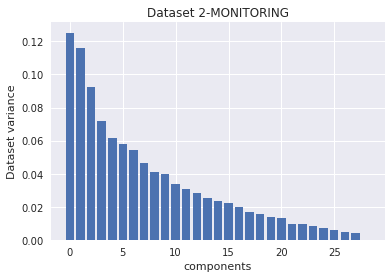

In [154]:
#Linear PCA
pca = RandomizedPCA()
X_r = pca.fit(X_SCALED).transform(X_SCALED)
print('explained variance ratio (first components)\n: %s'
      % str(pca.explained_variance_ratio_))

sum_t = 0.0
sum_arr = []
for r in pca.explained_variance_ratio_:
    if sum_t < THRESHOLD:
        sum_t += float(r)
        sum_arr.append(r)
        
print "Num components:", len(sum_arr), "for variance > 99% (variance:", sum_t, ")"

plt.bar(range(len(pca.explained_variance_ratio_)),pca.explained_variance_ratio_)
plt.ylabel("Dataset variance")
plt.xlabel("components")
plt.title("Dataset {}-MONITORING".format(index))

#save data_selection method
joblib.dump(pca, saveFileNames_pca[index]) 

In [155]:
#Kernel PCA (Experimental)
kpca = KernelPCA(kernel="rbf", fit_inverse_transform=True, gamma=10)
X_r = kpca.fit(X_SCALED).transform(X_SCALED)

print('explained variance ratio (first components)\n: %s'
      % str(pca.explained_variance_ratio_))


#save data_selection method
joblib.dump(kpca, saveFileNames_kpca[index]) 

explained variance ratio (first components)
: [ 0.1252543   0.11599406  0.09250455  0.07194644  0.06154873  0.05797642
  0.05421616  0.0464917   0.04119115  0.04000547  0.0337647   0.03068673
  0.02830573  0.02551213  0.02371962  0.02219667  0.0199815   0.01682108
  0.01541435  0.01375522  0.01313655  0.00981474  0.00938401  0.00819078
  0.00734724  0.00576953  0.00472154  0.00434887  0.        ]


['resources/kpca_cl0_short_3m_1m_monit_14012016.pkl']

#### b) Univariate feat selection (Using class label)

[61 65 22 53 58 47 27 51 10 17 30 52 39 37 26 14  5  6  2  1 21  3 25 33 34
 35  0 66  9 32 20 45 46 59 42 24 54  8  7 28 23 31 11 19 41 16 49 48 56 57
 55 15 44 12 38 40 67 13  4 43 50 36 29 62 64 18 63 60]
***Features sorted by significant p-score respect class feature:
[['HORAS_USO_MED_NOCHE_3' '61' '9.98761078473e-06']
 ['EPWORTH_3' '65' '0.00232731775384']
 ['CEFALEA' '22' '0.00492491434182']
 ['HORAS_USO_MED_NOCHE_1' '53' '0.0061620238897']
 ['EPWORTH_1' '58' '0.0192432499848']
 ['Sat O2' '47' '0.0443816603292']]

FEATS SIGNIFICANT: (29, 6)
FEATS SELECTED (by percentage): (29, 11)


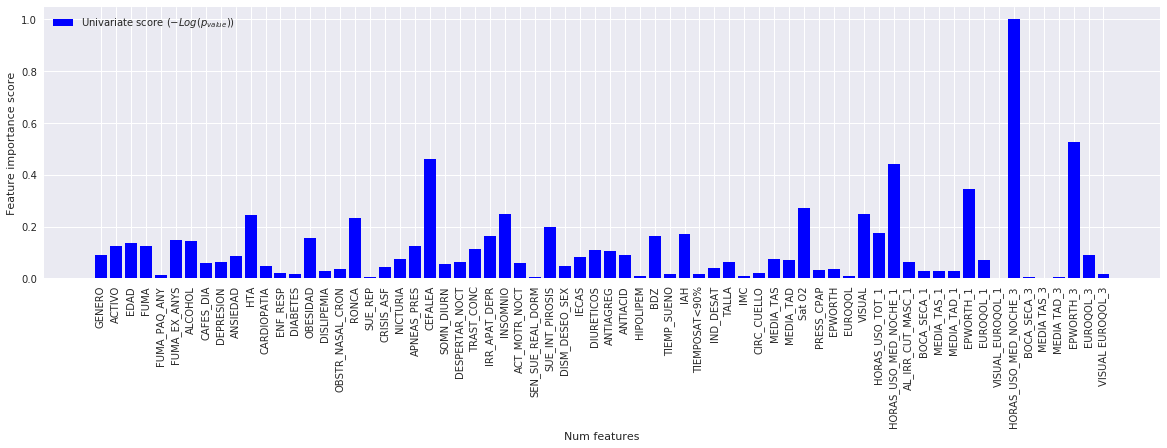

['resources/ftest_cl0_short_3m_1m_monit_14012016.pkl']

In [156]:
###############################################################################
# Univariate feature selection with F-test (ANOVA) for feature scoring
# We use the default selection function: the 15% most significant features
###############################################################################

selector = SelectPercentile(f_classif, percentile=15) #15
selector.fit(X_train, y_train)
print np.argsort(selector.scores_)[::-1]

# Filter columns (p-values <= 0.05)
feature_names = range(X_train.shape[1])
res = np.array([(columns[i], feature_names[i], selector.pvalues_[i]) 
                for i in np.argsort(selector.scores_)[::-1] if selector.pvalues_[i] <= 0.05])

print '***Features sorted by significant p-score respect class feature:\n', res

if res.shape[0] > 0:
    X_fs = X_train[:,res[:,1].astype(int)]
    print "\nFEATS SIGNIFICANT:", X_fs.shape
else:
    print "\nFEATS NO SIGNIFICANT"
    
print "FEATS SELECTED (by percentage):", selector.transform(X_train).shape

#Plot features by F-test score
scores = -np.log10(selector.pvalues_)
scores /= np.nanmax(scores)

plt.figure(figsize=(20,5))
plt.bar(np.arange(X.shape[-1]), scores, 
        label=r'Univariate score ($-Log(p_{value})$)', color='b')

plt.xticks(np.arange(X.shape[-1]), columns[:-1], rotation='vertical')
plt.legend()
plt.locator_params(axis = 'x', nbins = X.shape[-1]+1)
plt.xlabel("Num features")
plt.ylabel("Feature importance score")
plt.show()


#save data_selection method
joblib.dump(selector, saveFileNames_ftest[index]) 

In [157]:
res = []
for k in [85,90,95,99]:
    print "Selector k=", k
    print "**************"
    res.append(eval_fs(X_train,X_test,y_train,y_test, SelectPercentile(f_classif, percentile=k), "logReg"))
    res[-1].extend([k])

Selector k= 85
**************
[('Imputer', TypeFeatImputer(allNameCols=array(['GENERO', 'ACTIVO', ..., 'EUROQOL_3', 'VISUAL EUROQOL_3'],
      dtype='|S21'),
        dataCatCols=array([1, 1, ..., 0, 0]))), ('Scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('fs', SelectPercentile(percentile=85,
         score_func=<function f_classif at 0x7f73b67aaa28>)), ('logReg', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=42, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))]


/home/aegle/miniconda2/envs/myosa/lib/python2.7/site-packages/sklearn/feature_selection/univariate_selection.py:113: UserWarning: Features [54] are constant.
  UserWarning)
/home/aegle/miniconda2/envs/myosa/lib/python2.7/site-packages/sklearn/feature_selection/univariate_selection.py:114: RuntimeWarning: invalid value encountered in divide
  f = msb / msw
/home/aegle/miniconda2/envs/myosa/lib/python2.7/site-packages/sklearn/feature_selection/univariate_selection.py:113: UserWarning: Features [54] are constant.
  UserWarning)
/home/aegle/miniconda2/envs/myosa/lib/python2.7/site-packages/sklearn/feature_selection/univariate_selection.py:114: RuntimeWarning: invalid value encountered in divide
  f = msb / msw
/home/aegle/miniconda2/envs/myosa/lib/python2.7/site-packages/sklearn/feature_selection/univariate_selection.py:113: UserWarning: Features [54] are constant.
  UserWarning)
/home/aegle/miniconda2/envs/myosa/lib/python2.7/site-packages/sklearn/feature_selection/univariate_selection.py

Performance in test:
             precision    recall  f1-score   support

          0       0.75      0.50      0.60         6
          1       0.67      0.86      0.75         7

avg / total       0.71      0.69      0.68        13

[[3 3]
 [1 6]]
Selector k= 90
**************
[('Imputer', TypeFeatImputer(allNameCols=array(['GENERO', 'ACTIVO', ..., 'EUROQOL_3', 'VISUAL EUROQOL_3'],
      dtype='|S21'),
        dataCatCols=array([1, 1, ..., 0, 0]))), ('Scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('fs', SelectPercentile(percentile=90,
         score_func=<function f_classif at 0x7f73b67aaa28>)), ('logReg', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=42, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))]


/home/aegle/miniconda2/envs/myosa/lib/python2.7/site-packages/sklearn/feature_selection/univariate_selection.py:113: UserWarning: Features [54] are constant.
  UserWarning)
/home/aegle/miniconda2/envs/myosa/lib/python2.7/site-packages/sklearn/feature_selection/univariate_selection.py:114: RuntimeWarning: invalid value encountered in divide
  f = msb / msw
/home/aegle/miniconda2/envs/myosa/lib/python2.7/site-packages/sklearn/feature_selection/univariate_selection.py:113: UserWarning: Features [54] are constant.
  UserWarning)
/home/aegle/miniconda2/envs/myosa/lib/python2.7/site-packages/sklearn/feature_selection/univariate_selection.py:114: RuntimeWarning: invalid value encountered in divide
  f = msb / msw
/home/aegle/miniconda2/envs/myosa/lib/python2.7/site-packages/sklearn/feature_selection/univariate_selection.py:113: UserWarning: Features [54] are constant.
  UserWarning)
/home/aegle/miniconda2/envs/myosa/lib/python2.7/site-packages/sklearn/feature_selection/univariate_selection.py

Performance in test:
             precision    recall  f1-score   support

          0       0.75      0.50      0.60         6
          1       0.67      0.86      0.75         7

avg / total       0.71      0.69      0.68        13

[[3 3]
 [1 6]]
Selector k= 95
**************
[('Imputer', TypeFeatImputer(allNameCols=array(['GENERO', 'ACTIVO', ..., 'EUROQOL_3', 'VISUAL EUROQOL_3'],
      dtype='|S21'),
        dataCatCols=array([1, 1, ..., 0, 0]))), ('Scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('fs', SelectPercentile(percentile=95,
         score_func=<function f_classif at 0x7f73b67aaa28>)), ('logReg', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=42, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))]


/home/aegle/miniconda2/envs/myosa/lib/python2.7/site-packages/sklearn/feature_selection/univariate_selection.py:113: UserWarning: Features [54] are constant.
  UserWarning)
/home/aegle/miniconda2/envs/myosa/lib/python2.7/site-packages/sklearn/feature_selection/univariate_selection.py:114: RuntimeWarning: invalid value encountered in divide
  f = msb / msw
/home/aegle/miniconda2/envs/myosa/lib/python2.7/site-packages/sklearn/feature_selection/univariate_selection.py:113: UserWarning: Features [54] are constant.
  UserWarning)
/home/aegle/miniconda2/envs/myosa/lib/python2.7/site-packages/sklearn/feature_selection/univariate_selection.py:114: RuntimeWarning: invalid value encountered in divide
  f = msb / msw
/home/aegle/miniconda2/envs/myosa/lib/python2.7/site-packages/sklearn/feature_selection/univariate_selection.py:113: UserWarning: Features [54] are constant.
  UserWarning)
/home/aegle/miniconda2/envs/myosa/lib/python2.7/site-packages/sklearn/feature_selection/univariate_selection.py

Performance in test:
             precision    recall  f1-score   support

          0       0.75      0.50      0.60         6
          1       0.67      0.86      0.75         7

avg / total       0.71      0.69      0.68        13

[[3 3]
 [1 6]]
Selector k= 99
**************
[('Imputer', TypeFeatImputer(allNameCols=array(['GENERO', 'ACTIVO', ..., 'EUROQOL_3', 'VISUAL EUROQOL_3'],
      dtype='|S21'),
        dataCatCols=array([1, 1, ..., 0, 0]))), ('Scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('fs', SelectPercentile(percentile=99,
         score_func=<function f_classif at 0x7f73b67aaa28>)), ('logReg', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=42, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))]


/home/aegle/miniconda2/envs/myosa/lib/python2.7/site-packages/sklearn/feature_selection/univariate_selection.py:113: UserWarning: Features [54] are constant.
  UserWarning)
/home/aegle/miniconda2/envs/myosa/lib/python2.7/site-packages/sklearn/feature_selection/univariate_selection.py:114: RuntimeWarning: invalid value encountered in divide
  f = msb / msw
/home/aegle/miniconda2/envs/myosa/lib/python2.7/site-packages/sklearn/feature_selection/univariate_selection.py:113: UserWarning: Features [54] are constant.
  UserWarning)
/home/aegle/miniconda2/envs/myosa/lib/python2.7/site-packages/sklearn/feature_selection/univariate_selection.py:114: RuntimeWarning: invalid value encountered in divide
  f = msb / msw
/home/aegle/miniconda2/envs/myosa/lib/python2.7/site-packages/sklearn/feature_selection/univariate_selection.py:113: UserWarning: Features [54] are constant.
  UserWarning)
/home/aegle/miniconda2/envs/myosa/lib/python2.7/site-packages/sklearn/feature_selection/univariate_selection.py

Performance in test:
             precision    recall  f1-score   support

          0       0.75      0.50      0.60         6
          1       0.67      0.86      0.75         7

avg / total       0.71      0.69      0.68        13

[[3 3]
 [1 6]]


In [158]:
df = pd.DataFrame(res, columns=["cls","params","tr","cv_in_mean","cv_in_std","cv_out_mean","cv_out_std","test","fs-percentile"])
df

,cls,params,tr,cv_in_mean,cv_in_std,cv_out_mean,cv_out_std,test,fs-percentile
0,logReg,"[None, 0.7, l1]",1.00,0.83,0.09,0.84,0.11,0.68,85
1,logReg,"[None, 0.7, l1]",1.00,0.83,0.09,0.84,0.11,0.68,90
2,logReg,"[None, 0.7, l1]",1.00,0.83,0.09,0.84,0.11,0.68,95
3,logReg,"[None, 0.7, l1]",1.00,0.83,0.09,0.84,0.11,0.68,99


#### c) Combine univariate filters


PERCENTILE: 10
***************
Scorer: <function f_classif at 0x7f73b67aaa28>

FEATS SIGNIFICANT: 5
***Features sorted by significant p-score respect class feature:
                 feature  pvalue
0  HORAS_USO_MED_NOCHE_3    0.00
1              EPWORTH_3    0.00
2  HORAS_USO_MED_NOCHE_1    0.01
3              EPWORTH_1    0.02
4                 Sat O2    0.04

FEATS SELECTED (by percentage): 4
***Features sorted by significant p-score respect class feature:
                 feature  pvalue
0  HORAS_USO_MED_NOCHE_3    0.00
1              EPWORTH_3    0.00
2  HORAS_USO_MED_NOCHE_1    0.01
3              EPWORTH_1    0.02


/home/aegle/miniconda2/envs/myosa/lib/python2.7/site-packages/ipykernel/__main__.py:17: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 69 but corresponding boolean dimension is 68
/home/aegle/miniconda2/envs/myosa/lib/python2.7/site-packages/ipykernel/__main__.py:37: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 69 but corresponding boolean dimension is 68


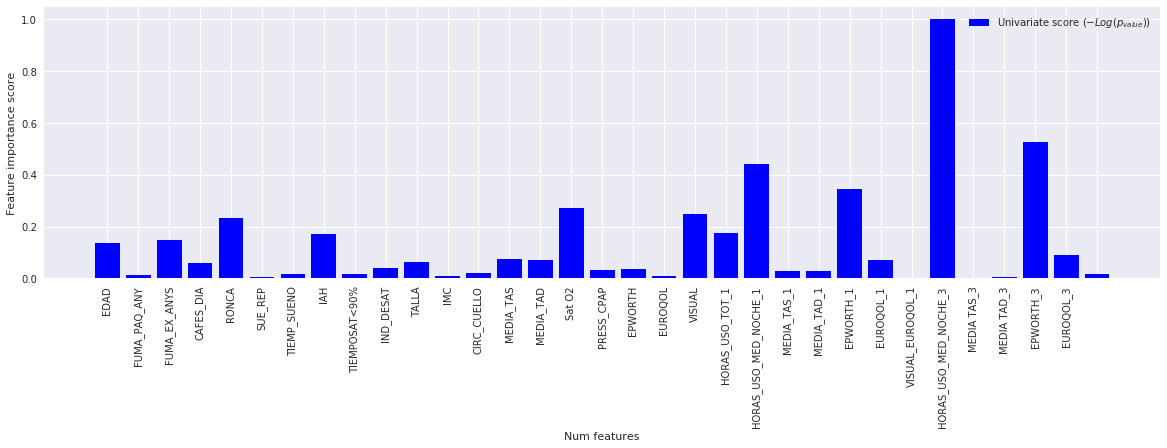

Scorer: <function chi2 at 0x7f73b67aa8c0>

FEATS SIGNIFICANT: 1
***Features sorted by significant p-score respect class feature:
   feature  pvalue
0  CEFALEA    0.02

FEATS SELECTED (by percentage): 4
***Features sorted by significant p-score respect class feature:
           feature  pvalue
0          CEFALEA    0.02
1         INSOMNIO    0.08
2    IRR_APAT_DEPR    0.14
3  SUE_INT_PIROSIS    0.15


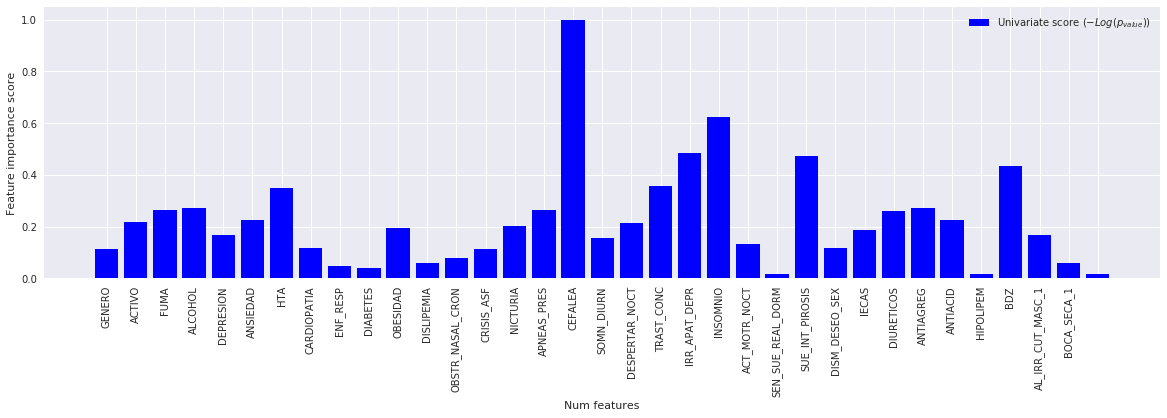

[[10, ['HORAS_USO_MED_NOCHE_3', 'EPWORTH_3', 'HORAS_USO_MED_NOCHE_1', 'EPWORTH_1', 'CEFALEA', 'INSOMNIO', 'IRR_APAT_DEPR', 'SUE_INT_PIROSIS'], [61, 65, 53, 58, 22, 27, 26, 30]]]


In [159]:
scorer = [f_classif,chi2]
colsPercSelected = []

for perc in [10]:
    cols_selected = []
    print "\nPERCENTILE:", perc
    print "***************"
        
    for sc_ix in range(len(scorer)):

        X_selected = X_train[:,catCols == sc_ix]
        selector = SelectPercentile(scorer[sc_ix], percentile=perc)
        selector.fit(X_selected, y_train)

        # Filter columns (p-values <= 0.05)
        res = pd.DataFrame(np.array([(columns[catCols == sc_ix][i], float(selector.pvalues_[i])) 
                        for i in np.argsort(selector.scores_)[::-1] ]),columns=["feature", "pvalue"])
        res.pvalue = pd.to_numeric(res.pvalue)

        print "Scorer:", scorer[sc_ix]
        print "\nFEATS SIGNIFICANT:", np.sum(res.iloc[:,1] < 0.05)    
        print '***Features sorted by significant p-score respect class feature:\n', res.loc[res.iloc[:,1] < 0.05,:]

        selFeats = selector.transform(X_selected).shape[1]
        print "\nFEATS SELECTED (by percentage):", selFeats
        print '***Features sorted by significant p-score respect class feature:\n', res.iloc[:selFeats,:]    
        cols_selected.extend(res.iloc[:selFeats,0])

        #Plot features by F-test score
        scores = -np.log10(selector.pvalues_)
        scores /= np.nanmax(scores)

        plt.figure(figsize=(20,5))
        plt.bar(np.arange(X_selected.shape[-1]), scores, 
                label=r'Univariate score ($-Log(p_{value})$)', color='b')

        plt.xticks(np.arange(X_selected.shape[-1]), columns[catCols == sc_ix][:-1], rotation='vertical')
        plt.legend()
        plt.locator_params(axis = 'x', nbins = X_selected.shape[-1]+1)
        plt.xlabel("Num features")
        plt.ylabel("Feature importance score")
        plt.show()

    ix_cols_selected = []
    for c in cols_selected:
        ix_cols_selected.extend(np.where(columns == c)[0])
        
    colsPercSelected.append([perc,cols_selected,ix_cols_selected])

print colsPercSelected

In [161]:
res = []
for k in [15,17,20,25,30,100]: #,11,13,15,25,50,55,65,75,85,90]:
    #res.append(eval_fs(X_train,X_test,y_train,y_test,FeatFilter(colsPercSelected[k][2]),"logReg"))
    res.append(eval_fs(X_train,X_test,y_train,y_test,UnivCombineFilter(catCols,reducedCols,k),"logReg"))    
    res[-1].extend([k])

[('Imputer', TypeFeatImputer(allNameCols=array(['GENERO', 'ACTIVO', ..., 'EUROQOL_3', 'VISUAL EUROQOL_3'],
      dtype='|S21'),
        dataCatCols=array([1, 1, ..., 0, 0]))), ('fs', UnivCombineFilter(catCols=array([1, 1, ..., 0, 0]),
         columns=array(['GENERO', 'ACTIVO', ..., 'EUROQOL_3', 'VISUAL EUROQOL_3'],
      dtype='|S21'),
         perc=15)), ('Scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('logReg', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=42, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))]
Performance in test:
             precision    recall  f1-score   support

          0       0.83      0.83      0.83         6
          1       0.86      0.86      0.86         7

avg / total       0.85      0.85      0.85        13

[[5 1]
 [1 6]]
[('Imputer', TypeFeatImputer(allNameCols=arr

In [162]:
#Zero for NaN scores
df = pd.DataFrame(res, columns=["cls","params","tr","cv_in_mean","cv_in_std","cv_out_mean","cv_out_std","test","fs-percentile"])
df

,cls,params,tr,cv_in_mean,cv_in_std,cv_out_mean,cv_out_std,test,fs-percentile
0,logReg,"[balanced, 0.5, l1]",0.90,0.81,0.09,0.83,0.15,0.85,15
1,logReg,"[balanced, 0.5, l1]",0.97,0.81,0.09,0.83,0.15,0.77,17
2,logReg,"[None, 0.5, l1]",0.97,0.83,0.09,0.84,0.13,0.77,20
3,logReg,"[balanced, 0.5, l1]",0.97,0.82,0.07,0.82,0.16,0.77,25
4,logReg,"[balanced, 0.5, l1]",0.97,0.81,0.07,0.82,0.14,0.77,30
5,logReg,"[None, 0.7, l1]",1.00,0.83,0.09,0.84,0.11,0.68,100


### d) ML feature selection (RFECV)

Optimal number of features : 8
Best score: 0.713001
Selected columns:
['CEFALEA' 'IRR_APAT_DEPR' 'ANTIAGREG' 'ANTIACID' 'Sat O2' 'VISUAL'
 'BOCA_SECA_1' 'HORAS_USO_MED_NOCHE_3']


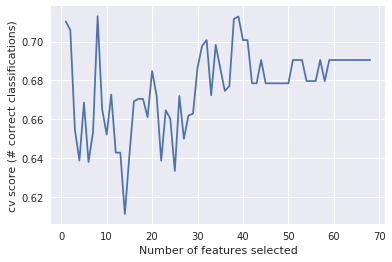

Optimal number of features : 2
Best score: 0.796847
Selected columns:
['ANTIACID' 'HORAS_USO_MED_NOCHE_3']


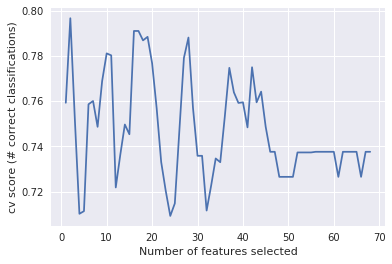

Optimal number of features : 3
Best score: 0.822999
Selected columns:
['RONCA' 'SUE_INT_PIROSIS' 'HORAS_USO_MED_NOCHE_3']


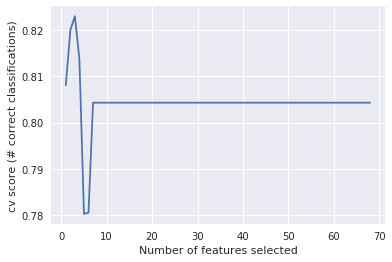

['resources/rfecv_cl0_short_3m_1m_monit_14012016.pkl']

In [164]:
# Create the RFECV object and compute a cross-validated score.
estimators = []
estimators.append(SVC(kernel="linear",))
estimators.append(LinearSVC())
estimators.append(LogisticRegression(penalty="l1"))

#CV strategy
cv = cross_validation.ShuffleSplit(len(y_train), n_iter=10, test_size=0.3,random_state=0)

# The scoring is proportional to the number of correct classifications
best_est = 0
best_score = 0
for i, cls in enumerate(estimators):
    rfecv = RFECV(estimator=cls, step=1, cv=cv, scoring='f1_weighted') #precision_weighted

    rfecv.fit(X_SCALED, y_train)
    score = rfecv.grid_scores_[rfecv.n_features_ - 1]
    print("Optimal number of features : %d" % rfecv.n_features_)
    print("Best score: %f" % (rfecv.grid_scores_[rfecv.n_features_ - 1]))
    print "Selected columns:\n", np.array(columns[:-1])[rfecv.ranking_ == 1]
    
    if score > best_score:
          best_est = rfecv
          best_score = score
          
    # Plot number of features VS. cross-validation scores
    plt.figure()
    plt.xlabel("Number of features selected")
    plt.ylabel("cv score (# correct classifications)")
    plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
    plt.show()

#save data_selection method
joblib.dump(best_est, saveFileNames_rfecv[index])

In [175]:
# Create the RFECV object and compute a cross-validated score.
res = []

# The scoring is proportional to the number of correct classifications
for k in [5,10,15,30,40]:
    rfecv = RFE(estimator=LogisticRegression(penalty="l1"), step=1,n_features_to_select=k) #precision_weighted

    res.append(eval_fs(X_train,X_test,y_train,y_test,rfecv,"rf"))    
    res[-1].extend([k])

[('Imputer', TypeFeatImputer(allNameCols=array(['GENERO', 'ACTIVO', ..., 'EUROQOL_3', 'VISUAL EUROQOL_3'],
      dtype='|S21'),
        dataCatCols=array([1, 1, ..., 0, 0]))), ('Scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('fs', RFE(estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
  n_features_to_select=5, step=1, verbose=0)), ('rf', RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=-1, oob_score=False, random_state=42,
            verbose=0, warm_start=False))]
Performance in test:
        

In [176]:
#One for NaN scores
df = pd.DataFrame(res, columns=["cls","params","tr","cv_in_mean","cv_in_std","cv_out_mean","cv_out_std","test","fs-ix"])
df

,cls,params,tr,cv_in_mean,cv_in_std,cv_out_mean,cv_out_std,test,fs-ix
0,rf,"[entropy, 4, balanced, 100]",1.00,0.82,0.15,0.76,0.10,0.59,5
1,rf,"[entropy, None, None, 750]",1.00,0.78,0.13,0.86,0.14,0.84,10
2,rf,"[entropy, 6, None, 100]",1.00,0.72,0.10,0.86,0.09,0.75,15
3,rf,"[gini, None, None, 500]",1.00,0.71,0.16,0.82,0.14,0.84,30
4,rf,"[entropy, None, balanced, 100]",1.00,0.70,0.18,0.74,0.18,0.75,40


### e) ML Feature selection (Using trees)

Feature ranking:
1. feature 61 GENERO (0.098379 accumulated 0.098379)
2. feature 22 ACTIVO (0.068197 accumulated 0.166577)
3. feature 53 EDAD (0.045171 accumulated 0.211748)
4. feature 65 FUMA (0.038184 accumulated 0.249932)
5. feature 10 FUMA_PAQ_ANY (0.034429 accumulated 0.284361)
6. feature 17 FUMA_EX_ANYS (0.031304 accumulated 0.315665)
7. feature 47 ALCOHOL (0.030022 accumulated 0.345688)
8. feature 27 CAFES_DIA (0.028049 accumulated 0.373737)
9. feature 30 DEPRESION (0.026247 accumulated 0.399983)
10. feature 51 ANSIEDAD (0.022988 accumulated 0.422971)
11. feature 6 HTA (0.022202 accumulated 0.445174)
12. feature 43 CARDIOPATIA (0.019880 accumulated 0.465054)
13. feature 58 ENF_RESP (0.019549 accumulated 0.484603)
14. feature 40 DIABETES (0.017911 accumulated 0.502514)
15. feature 39 OBESIDAD (0.017728 accumulated 0.520242)
16. feature 44 DISLIPEMIA (0.016127 accumulated 0.536369)
17. feature 11 OBSTR_NASAL_CRON (0.016058 accumulated 0.552426)
18. feature 25 RONCA (0.014731 accum

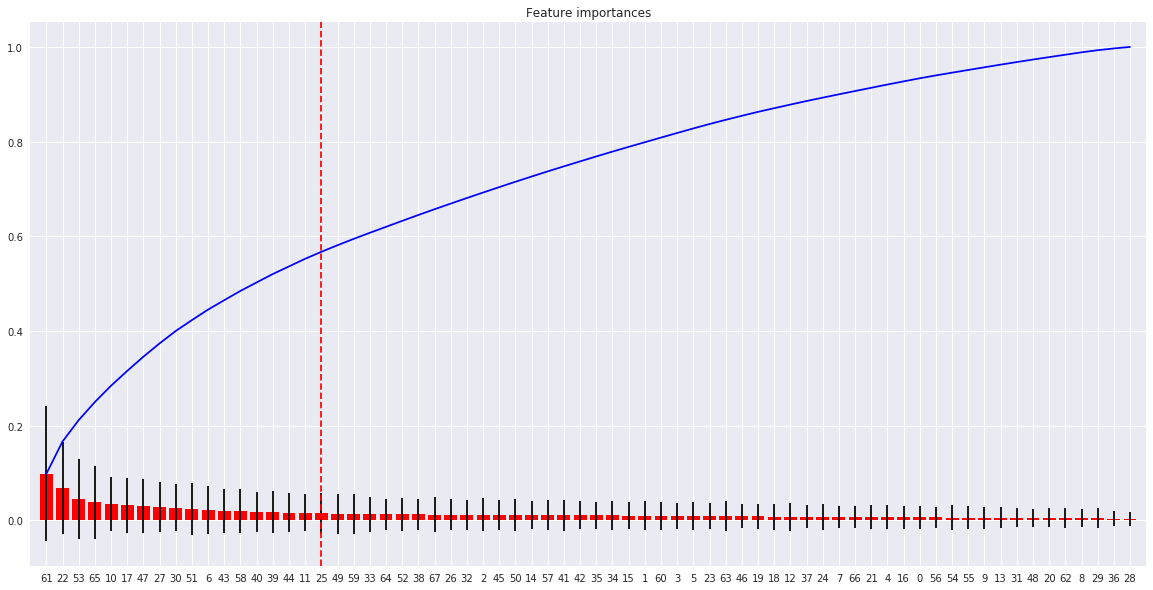

['resources/extra_cl0_short_3m_1m_monit_14012016.pkl']

In [177]:
# Build a forest and compute the feature importances
forest = ExtraTreesClassifier(n_estimators=250, n_jobs= -1, random_state=0)
forest.fit(X_SCALED, y_train)

sfm = SelectFromModel(forest, prefit=True)
num_feats = sfm.transform(X_SCALED).shape[1]

importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

found = False
accImp = 0.0
for f in range(num_feats):
    accImp += importances[indices[f]]
    print("%d. feature %d %s (%f accumulated %f)" % (f + 1, indices[f], columns[f], importances[indices[f]], accImp))

# Plot the feature importances of the forest
plt.figure(figsize=(20,10))
plt.title("Feature importances")
plt.bar(range(X_SCALED.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")

cumulative = np.cumsum(importances[indices])
plt.plot(range(X_SCALED.shape[1]), cumulative, c='blue')
plt.axvline(f, color='r', linestyle='--')

plt.xticks(range(X_SCALED.shape[1]), indices)
plt.xlim([-1, X_SCALED.shape[1]])
plt.show()

#save data_selection method    
joblib.dump(sfm, saveFileNames_extra[index])

In [178]:
# Create the RFECV object and compute a cross-validated score.
res = []

# The scoring is proportional to the number of correct classifications
for k in [100,250,500]:
    forest = ExtraTreesClassifier(n_estimators=k, n_jobs= -1, random_state=0)
    sfm = SelectFromModel(forest)

    res.append(eval_fs(X_train,X_test,y_train,y_test,sfm,"rf"))    
    res[-1].extend([k])

[('Imputer', TypeFeatImputer(allNameCols=array(['GENERO', 'ACTIVO', ..., 'EUROQOL_3', 'VISUAL EUROQOL_3'],
      dtype='|S21'),
        dataCatCols=array([1, 1, ..., 0, 0]))), ('Scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('fs', SelectFromModel(estimator=ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
           max_depth=None, max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=100, n_jobs=-1, oob_score=False, random_state=0,
           verbose=0, warm_start=False),
        prefit=False, threshold=None)), ('rf', RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n

In [179]:
#One for NaN scores
df = pd.DataFrame(res, columns=["cls","params","tr","cv_in_mean","cv_in_std","cv_out_mean","cv_out_std","test","fs-ix"])
df

,cls,params,tr,cv_in_mean,cv_in_std,cv_out_mean,cv_out_std,test,fs-ix
0,rf,"[gini, None, balanced, 750]",1.00,0.67,0.16,0.75,0.09,0.75,100
1,rf,"[entropy, None, balanced, 750]",1.00,0.71,0.13,0.76,0.12,0.65,250
2,rf,"[entropy, None, None, 1000]",1.00,0.70,0.16,0.79,0.10,0.65,500


#### Lasso feature selection

In [29]:
#CV strategy
cv = cross_validation.ShuffleSplit(len(y_train), n_iter=10, test_size=0.3,random_state=0)
alphas = np.logspace(-4, -.5, 30)

# Build a forest and compute the feature importances
lsvc = LassoCV(cv=cv, n_jobs=-1,random_state=32,)
lsvc.fit(X_SCALED, y_train)

#Opt-1
# Set a minimum threshold of 0.25
sfm = SelectFromModel(lsvc, threshold="mean", prefit=True)
n_features = sfm.transform(X_SCALED).shape[1]
print "number of features selected:", n_features
print "Selected columns:\n", np.array(columns)[:-1][sfm.get_support() == 1]

#Opt-2
sfm = SelectFromModel(lsvc, threshold=1e-5, prefit=True)
n_features = sfm.transform(X_SCALED)
print "number of features selected:", n_features.shape
print "Selected columns:\n", np.array(columns)[:-1][sfm.get_support() == 1]

#save data_selection method    
joblib.dump(sfm, saveFileNames_lasso[index])

number of features selected: 7
Selected columns:
['FUMA_EX_ANYS' 'CEFALEA' 'IRR_APAT_DEPR' 'IECAS' 'ANTIAGREG' 'Sat O2'
 'VISUAL']
number of features selected: (30, 9)
Selected columns:
['FUMA_EX_ANYS' 'ANSIEDAD' 'CEFALEA' 'IRR_APAT_DEPR' 'IECAS' 'ANTIAGREG'
 'Sat O2' 'EPWORTH' 'VISUAL']


['resources/lasso_cl0_short_no_monit_14012016.pkl']

### Forward selection

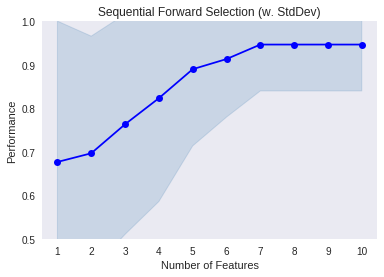

[[0, 'GENERO'], [2, 'EDAD'], [4, 'FUMA_EX_ANYS'], [5, 'ALCOHOL'], [39, 'IAH'], [41, 'IND_DESAT'], [44, 'MEDIA_TAS'], [48, 'EPWORTH'], [26, 'INSOMNIO'], [37, 'BDZ']]


,avg_score,ci_bound,cv_scores,feature_idx,std_dev,std_err
1,0.68,0.24,"[0.5, 0.733333333333, 0.333333333333, 0.533333...","(44,)",0.32,0.11
2,0.70,0.20,"[0.733333333333, 0.5, 0.333333333333, 0.533333...","(44, 5)",0.27,0.09
3,0.76,0.19,"[1.0, 0.5, 0.733333333333, 0.533333333333, 1.0...","(26, 44, 5)",0.25,0.08
4,0.82,0.18,"[1.0, 0.5, 0.733333333333, 0.666666666667, 1.0...","(26, 44, 5, 37)",0.24,0.08
5,0.89,0.13,"[1.0, 0.5, 0.733333333333, 0.666666666667, 1.0...","(48, 26, 44, 5, 37)",0.18,0.06
6,0.91,0.10,"[1.0, 0.733333333333, 0.733333333333, 0.666666...","(48, 4, 5, 26, 44, 37)",0.13,0.04
7,0.95,0.08,"[1.0, 0.733333333333, 0.733333333333, 1.0, 1.0...","(48, 4, 5, 41, 26, 44, 37)",0.11,0.04
8,0.95,0.08,"[1.0, 0.733333333333, 0.733333333333, 1.0, 1.0...","(48, 0, 4, 5, 41, 26, 44, 37)",0.11,0.04
9,0.95,0.08,"[1.0, 0.733333333333, 0.733333333333, 1.0, 1.0...","(0, 2, 4, 5, 41, 44, 48, 26, 37)",0.11,0.04
10,0.95,0.08,"[1.0, 0.733333333333, 0.733333333333, 1.0, 1.0...","(0, 2, 4, 5, 39, 41, 44, 48, 26, 37)",0.11,0.04


In [32]:
#model = KNeighborsClassifier(n_neighbors=3)
#model = RandomForestClassifier(n_estimators=50,random_state=33,class_weight="balanced")
model = SVC(kernel="rbf")
sfs = SFS(model, n_jobs=-1,
          k_features=10, 
          forward=True, 
          floating=True, 
          scoring='f1_weighted',
          verbose=0,
          cv=10)

sfs = sfs.fit(X_SCALED, y_train)

fig1 = plot_sfs(sfs.get_metric_dict(), kind='std_dev')

plt.ylim([0.5, 1])
plt.title('Sequential Forward Selection (w. StdDev)')
plt.grid()
plt.show()

df = pd.DataFrame.from_dict(sfs.get_metric_dict()).T
print [[i,columns[i]] for i in df.iloc[-1].feature_idx]
df

### Join Mutual information
http://danielhomola.com/2016/01/31/mifs-parallelized-mutual-information-based-feature-selection-module/

In [81]:
# perform feature selection
print np.sum(np.isnan(X_SCALED)), X_SCALED.shape
print np.sum(np.isnan(y_train)), len(y_train)

methods = ["JMI"]
dfRes = []
for method in methods:
    
    cvFold = StratifiedShuffleSplit(y_train, n_iter=10,test_size=0.1,random_state=22)
    
    for i,cv in enumerate(cvFold):
        X_cv = X[cv[0]]
        y_cv = y[cv[0]]
        
        feat_selector = mifs.MutualInformationFeatureSelector(method=method, verbose=2,n_features=10)
        feat_selector.fit(X_cv,y_cv)

        # check selected features
        print "Fold:", i
        #print "Method:", method    
        #print "Total feats:", np.sum(feat_selector.support_)    
        #print "Feats:", np.array(columns)[:-1][feat_selector.support_]
        #print feat_selector.ranking_
        #print np.array(columns)[:-1][feat_selector.ranking_]
        
        dfRes.append(feat_selector.ranking_)

0 (30, 51)
0 30
Selected feature #1 / 10 : 42, JMIM: 0.0699485480095
Selected feature #2 / 10 : 44, JMIM: 0.0896210224131
Selected feature #3 / 10 : 40, JMIM: 0.085407709703
Selected feature #4 / 10 : 50, JMIM: 0.210585977937
Selected feature #5 / 10 : 2, JMIM: 0.11932569501
Selected feature #6 / 10 : 41, JMIM: 0.11932569501
Selected feature #7 / 10 : 38, JMIM: 0.11932569501
Selected feature #8 / 10 : 6, JMIM: 0.11932569501
Selected feature #9 / 10 : 22, JMIM: 0.111242214704
Selected feature #10 / 10 : 47, JMIM: 0.103418762436
Fold: 0
Method: JMI
Total feats: 10
Feats: ['EDAD' 'CAFES_DIA' 'SOMN_DIURN' 'TIEMP_SUENO' 'TIEMPOSAT<90%' 'IND_DESAT'
 'IMC' 'MEDIA_TAS' 'PRESS_CPAP' 'VISUAL']
[42L, 44, 40, 50, 2, 41, 38, 6, 22, 47]
['IMC' 'MEDIA_TAS' 'TIEMPOSAT<90%' 'VISUAL' 'EDAD' 'IND_DESAT'
 'TIEMP_SUENO' 'CAFES_DIA' 'SOMN_DIURN' 'PRESS_CPAP']
Selected feature #1 / 10 : 41, JMIM: 0.0692056504454
Selected feature #2 / 10 : 40, JMIM: 0.0526281949791
Selected feature #3 / 10 : 42, JMIM: 0.04908

In [82]:
print dfRes
dfFeats = pd.DataFrame(np.hstack(dfRes).T,columns=["feats"])
dfFeats["count"] = 1
grp = dfFeats.groupby("feats").agg("count").reset_index()
grp.sort_values("count", ascending=False, inplace=True)
grp.reset_index(inplace=True)
grp["name"] = np.array(columns)[:-1][grp.feats]
grp = grp[["feats", "name","count"]]
grp

[[42L, 44, 40, 50, 2, 41, 38, 6, 22, 47], [41L, 40, 42, 44, 50, 2, 39, 6, 45, 22], [44L, 45, 42, 50, 38, 43, 48, 41, 40, 9], [41L, 44, 2, 50, 6, 39, 22, 38, 47, 49], [41L, 44, 39, 50, 40, 43, 42, 48, 45, 49], [42L, 41, 50, 40, 44, 47, 6, 2, 22, 45], [40L, 42, 45, 50, 39, 48, 44, 2, 6, 38], [38L, 41, 40, 50, 44, 43, 6, 39, 2, 22], [42L, 38, 40, 50, 2, 6, 22, 47, 23, 49], [41L, 44, 42, 50, 40, 39, 49, 2, 22, 38]]


,feats,name,count
0,50,VISUAL,10
1,40,TIEMPOSAT<90%,9
2,44,MEDIA_TAS,9
3,42,IMC,8
4,2,EDAD,8
5,41,IND_DESAT,8
6,38,TIEMP_SUENO,7
7,6,CAFES_DIA,7
8,22,SOMN_DIURN,7
9,39,IAH,6


In [80]:
print dfRes
dfFeats = pd.DataFrame(np.hstack(dfRes).T,columns=["feats"])
dfFeats["count"] = 1
grp = dfFeats.groupby("feats").agg("count").reset_index()
grp.sort_values("count", ascending=False, inplace=True)
grp.reset_index(inplace=True)
grp["name"] = np.array(columns)[:-1][grp.feats]
grp = grp[["feats", "name","count"]]
grp

[[42L, 44, 40, 50, 6, 22, 47, 18, 14, 23], [41L, 40, 42, 50, 6, 44, 22, 14, 31, 19], [44L, 45, 42, 22, 40, 43, 48, 9, 38, 41], [41L, 44, 2, 50, 6, 22, 47, 18, 14, 46], [41L, 44, 39, 50, 49, 48, 38, 43, 19, 42], [42L, 41, 40, 47, 6, 22, 45, 18, 44, 48], [40L, 42, 45, 50, 39, 48, 6, 22, 47, 2], [38L, 41, 40, 6, 22, 43, 45, 2, 47, 14], [42L, 38, 40, 50, 6, 22, 47, 23, 14, 46], [41L, 44, 42, 50, 39, 22, 6, 47, 45, 49]]


,feats,name,count
0,22,SOMN_DIURN,9
1,6,CAFES_DIA,8
2,42,IMC,8
3,40,TIEMPOSAT<90%,7
4,47,PRESS_CPAP,7
5,44,MEDIA_TAS,7
6,41,IND_DESAT,7
7,50,VISUAL,7
8,14,DISLIPEMIA,5
9,45,MEDIA_TAD,5


#### Boruta FS
http://danielhomola.com/2015/05/08/borutapy-an-all-relevant-feature-selection-method/